# Diagnóstico de modelos usando statsmodels

## Problema

Se quiere saber si el valor de una variable independiente (y) se encuentra asociada con el valor de una variable independiente (x).

El modelo se estima utilizando la regresión de mínimos cuadrados ordinarios.

In [2]:
import pandas as pd
data = pd.read_csv("DataSimpleLinearRegression.csv")
data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


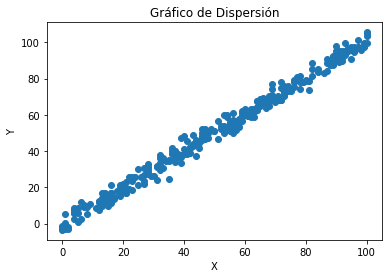

In [3]:
import matplotlib.pyplot as plt
plt.scatter(data['x'], data['y'])
plt.title('Gráfico de Dispersión')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Comenzamos a trabajar 

Para ajustar la mayoría de los modelos cubiertos por statsmodels (https://www.statsmodels.org/stable/index.html) , se deben crear 2 matrices de diseño.

+ La primera matriz es una matriz de variables endógenas, también conocidas como dependientes o de regresión.
+ La segunda matriz es una matriz de variables exógenas, también conocidas como independientes, predictoras o regresoras.

El módulo patsy proporciona una función conveniente para preparar matrices de diseño.

## PASO 1 - Crear las matrices

In [4]:
from patsy import dmatrices
y, X = dmatrices('y ~ x', data = data, return_type = 'dataframe')
y[:3]

,y
0,79.775152
1,23.177279
2,25.609262


## PASO 2 - Ajuste y reducción del modelo

In [5]:
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

NameError: name 'sm' is not defined


## Explicando la tabla anterior

Antes de comenzar se van a considerar algunos conceptos previos

### Modelo de regresión ineal

Predicciones de una variable independiente (y) sabiendo los valores de otras variables indepedientes $x_{1}$, $x_{2}$, ... $x_{n}$; en caso de que n sea superior a 1 entonces se trata de regresión lineal múltiple.

### Ecuación de regresión

$y = w_{0} + w_{1}x$ : donde $w_{0}$ es el punto de intersección con el eje Y y $w_{1}$ es la pendiente de la recta

### Método de los mínimos cuadrados

Se utiliza para calcular los valores de $w_{0}$ y $w_{1}$  la recta de la regresión lineal que minimiza los residuos.

## Explicando la tabla

En la especificación de un modelo se debe verificar lo siguiente:

 + Los parámetros del modelo  $w_{0}$ y $w_{1}$ deben ser estadísticamente diferentes de cero.
 + La distribución de los errores 𝑒 debe ser normal.
 + La varianza de los errores $\sigma^{2}$ debe ser constante.

El no cumplimiento de estos supuestos indica que pueden haber problemas en la especificación del modelo o en los datos.

## Valores Relevantes

### Estadístico F

En la tabla, es de particular interés el estadístico F. La hipótesis nula es que todos los parámetros del modelo ( $w_{0}$ y $w_{1}$) son diferentes de cero, versus la hipótesis alterna en que se indica que al menos uno de ellos no es significativamente de cero.

### Coeficiente de determinación (R-squared)

El coeficiente de determinación mide cuanta de la variación de $\textit{y}$ es explicada por el modelo. Su fórmula es:
$𝑅^{2}=1−\frac{\sigma_e^{2}}{\sigma_y^{2}}$

Si la varianza de los errores (diferencia entre el valor real y el predecido) $\sigma_e^{2}$ es cero, el modelo explica el 100% de la variable 𝑦. Si $\sigma_e^{2}$ es igual a la varianza de 𝑦 ($\sigma_y^{2}$) el modelo no explica nada y $𝑅^{2}$ vale cero.

### Coeficiente de determinación (Adj. R-squared)

El coeficiente de correlación ajustado $𝑅^{2}$ corrige el valor de $𝑅^{2}$ por la cantidad de variables 𝑘 (igual a 1 para el caso analizado) y la cantidad de datos 𝑁:

$𝑅^{2}Ajustado=1−\frac{𝑁−1}{𝑁−𝑘−1}(1−𝑅^{2})$





## PASO 3 - Gráficos

Se van a generar algunos gráficos

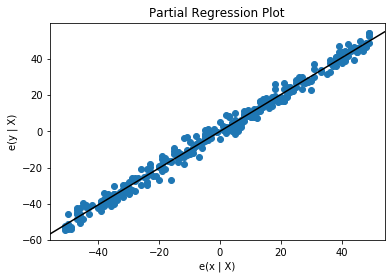

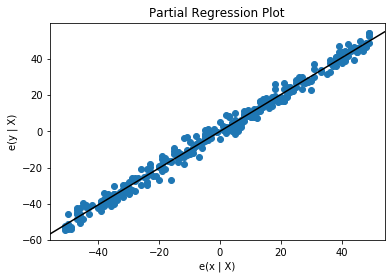

In [18]:
sm.graphics.plot_partregress('y','x',[], data = data, obs_labels=False)

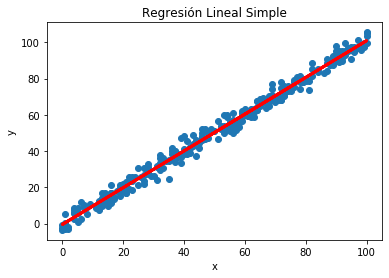

In [19]:
plt.scatter(data['x'], data['y'])
plt.plot(data['x'], resultado.predict(), color="red", linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

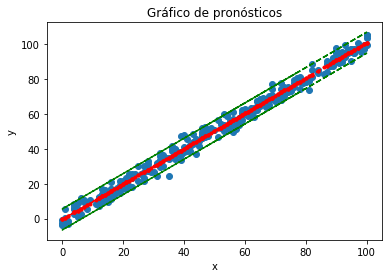

In [32]:
##
## Gráfico del pronóstico usando statsmodel
##

from statsmodels.sandbox.regression.predstd import wls_prediction_std

mean_pred, lower, upper = wls_prediction_std(resultado)
X = data['x']
plt.plot(X, y, 'o', label="data")
plt.plot(X, resultado.fittedvalues, 'r--.', label="OLS")
plt.plot(X, upper, 'g--')
plt.plot(X, lower, 'g--');
plt.title('Gráfico de pronósticos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

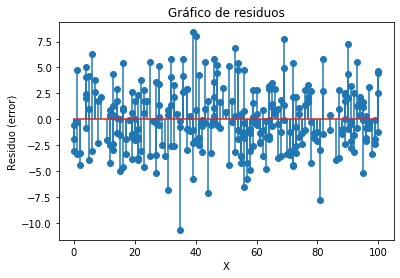

In [35]:
## Gráfico de residuos
plt.stem(data['x'], resultado.resid, use_line_collection=True);
plt.title("Gráfico de residuos")
plt.xlabel("X")
plt.ylabel("Residuo (error)")
plt.show()

In [34]:
## Valores predecidos
resultado.predict()

array([ 77.64201157,  20.83923168,  21.85356704,  19.82489633,
        36.05426201,  14.75321955,  62.42698124,  95.90004796,
        19.82489633,   4.609866  ,   3.59553065,  18.81056097,
        96.91438332,  62.42698124,  36.05426201,  14.75321955,
        65.46998731,  13.7388842 ,  87.78536512,  69.52732873,
        89.81403583,  51.26929234,  89.81403583,  26.92524381,
        97.92871867,  58.36963982,  79.67068228,  20.83923168,
        93.87137725,  26.92524381,  99.95738938,  30.98258524,
        33.01125595,  80.68501764,  27.93957917,  47.21195092,
        53.29796305,  69.52732873,  27.93957917,  33.01125595,
        91.84270654,  71.55599944,  50.25495698,  76.62767622,
         3.59553065,  37.06859737,  70.54166408,  68.51299337,
        40.11160343,  35.03992666,  94.88571261,  88.79970048,
        52.28362769,  30.98258524,  59.38397518,  -0.46181077,
        39.09726808,  64.45565195,  69.52732873,  57.35530447,
        12.72454884,  72.57033479,  76.62767622,  61.41